In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Reading JSON

In [2]:
folks_url = 'https://andybek.com/pandas-folks-json'

In [3]:
folks = pd.read_json(folks_url)

In [4]:
folks

,name,salary,occupation
0,Brian Dogood,64000,Software Technician
1,Leah Bokeh,73200,Data Scientist
2,Mark Prescott,76400,Business Consultant
3,Jurgen Gupta,94300,Aerospace Engineer


# Reading HTML

In [5]:
#Objective - to create a dataframe with countries and their populations

In [6]:
country_url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'

In [15]:
country = pd.read_html(country_url,header=0)

In [16]:
country[0].head()

,Location,Population,% of world,Date,Source (official or from the United Nations),Notes
0,World,8232000000,100%,13 Jun 2025,UN projection[1][3],NaN
1,India,1413324000,17.3%,1 Mar 2025,Official projection[4],[b]
2,China,1408280000,17.2%,31 Dec 2024,Official estimate[5],[c]
3,United States,340110988,4.2%,1 Jul 2024,Official estimate[6],[d]
4,Indonesia,282477584,3.5%,30 Jun 2024,National annual projection[7],NaN


In [17]:
country = country[0].loc[1:,['Location','Population']]

In [18]:
country

,Location,Population
1,India,1413324000
2,China,1408280000
3,United States,340110988
4,Indonesia,282477584
5,Pakistan,241499431
...,...,...
235,Niue (New Zealand),1681
236,Tokelau (New Zealand),1647
237,Vatican City,882
238,Cocos (Keeling) Islands (Australia),593


In [19]:
country.rename(columns={'Location':'Country'},inplace=True)

In [23]:
country.head()

,Country,Population
1,India,1413324000
2,China,1408280000
3,United States,340110988
4,Indonesia,282477584
5,Pakistan,241499431


In [31]:
country['Country'].replace(r'\([^)]*\)','',regex=True,inplace=True)

In [32]:
country

,Country,Population
1,India,1413324000
2,China,1408280000
3,United States,340110988
4,Indonesia,282477584
5,Pakistan,241499431
...,...,...
235,Niue,1681
236,Tokelau,1647
237,Vatican City,882
238,Cocos Islands,593


In [33]:
sns.set()

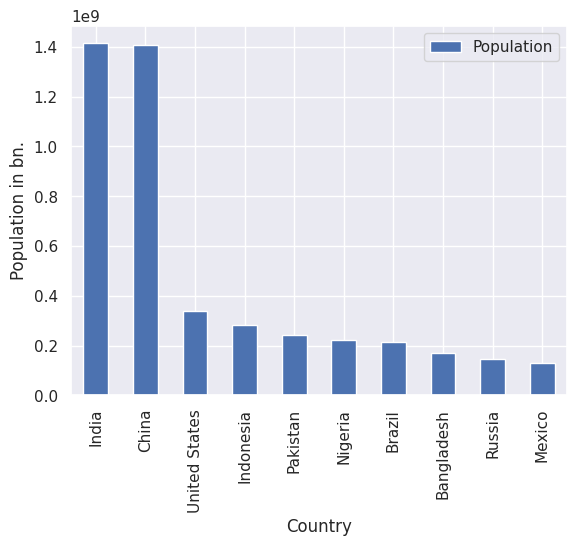

In [34]:
country.nlargest(10,'Population').plot(kind='bar',x='Country',ylabel='Population in bn.');

# Skill Challenge

In [35]:
#Read table from the url https://andybek.com/traders/ into a pandas dataframe positions.

In [36]:
positions = pd.read_html('https://andybek.com/traders/')

In [48]:
positions[0]

,TraderID,Instrument,Amount,Trader Location
0,MCBIRN,02079K107,150000,EU
1,WISEA,1350Z74U5,6400000,EU
2,IACOP,GB00B3KJDQ49,2430000,US


In [38]:
#Read url https://andybek.com/pandas-traders-names into a dataframe traders.

In [40]:
traders = pd.read_json('https://andybek.com/pandas-traders-names')

In [41]:
traders

,names,alias,seniority
0,Shylah McBirney,MCBIRN,Executive
1,Allen Wise,WISEA,Executive
2,Iacopo Brivio,IACOP,Junior
3,Allison Carter,CARTERA,Mid-level


In [42]:
#combine the two dataframes traders and positions into a dataframe that combines positions with full name and seniroty.

In [51]:
merged_trader = positions[0].merge(traders,left_on='TraderID',right_on='alias',how='right')
merged_trader.drop('alias',axis=1,inplace=True)

In [52]:
merged_trader

,TraderID,Instrument,Amount,Trader Location,names,seniority
0,MCBIRN,02079K107,150000.0,EU,Shylah McBirney,Executive
1,WISEA,1350Z74U5,6400000.0,EU,Allen Wise,Executive
2,IACOP,GB00B3KJDQ49,2430000.0,US,Iacopo Brivio,Junior
3,NaN,NaN,NaN,NaN,Allison Carter,Mid-level


In [53]:
#Save the merged dataframe into a pickle file called pickled_positions as well as a csv called positions.csv.

In [56]:
merged_trader.to_pickle('pickled_positions')

In [57]:
merged_trader.to_csv('positions.csv')